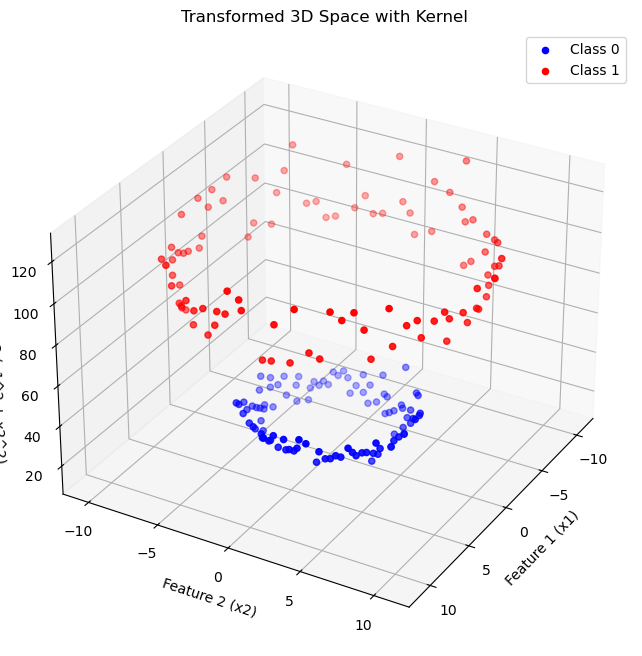

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a 2D dataset with two classes forming concentric circles
np.random.seed(0)
n_samples = 100
r_inner = 5 + np.random.randn(n_samples) * 0.5
r_outer = 10 + np.random.randn(n_samples) * 0.5

theta_inner = np.linspace(0, 2*np.pi, n_samples)
theta_outer = np.linspace(0, 2*np.pi, n_samples)

x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

# Transform the data into 3D using a kernel-like transformation
z_inner = x_inner**2 + y_inner**2
z_outer = x_outer**2 + y_outer**2

# Plot the transformed 3D dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_inner, y_inner, z_inner, color='blue', label='Class 0')
ax.scatter(x_outer, y_outer, z_outer, color='red', label='Class 1')
ax.set_title("Transformed 3D Space with Kernel")
ax.set_xlabel("Feature 1 (x1)")
ax.set_ylabel("Feature 2 (x2)")
ax.set_zlabel("Feature 3 (x1^2 + x2^2)")
ax.view_init(elev=30, azim=30)
plt.legend()
plt.show()

Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the UCI Mushroom Data Set stored in mushrooms.csv.

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

1. Importing Libraries
2. Loading the Data
3. One-Hot Encoding the Data: 

    3.1 get_dummies converts categorical variables into a binary (0 or 1) format. Each unique value in a categorical feature becomes a new column.

    3.2 For example, if the dataset has a column “color” with values “red”, “green”, and “blue”, get_dummies would create three new columns: “color_red”, “color_green”, and “color_blue”, with binary values indicating the presence of each color.

4. Sampling a Subset of the Data:

	4.1 This line randomly selects 8% of the rows from df2 and stores them in df3.

	4.2 This is likely done to reduce the dataset size for faster processing during the PCA and plotting.

5. Splitting Features and Target: 

	5.1 X: The feature matrix, containing all columns except the first two. The iloc[:,2:] slices the DataFrame, selecting all columns from the third one onwards.

	5.2 y: The target variable, which is assumed to be in the second column (index 1) of df3.(which is likely the column indicating whether a mushroom is edible or poisonous).

6. Applying Principal Component Analysis (PCA):

	6.1 PCA is applied to X to reduce its dimensionality from the original number of features to just two principal components.

	6.2 fit_transform performs PCA and returns a new matrix with two columns representing the two principal components.

7. Splitting Data into Training and Testing Sets:

	7.1 The data is split into training and testing sets. train_test_split splits the pca matrix (features) and y (target) into X_train, X_test, y_train, and y_test.

	7.2 random_state=0 ensures that the split is reproducible.

8. Plotting the Data: 
 	8.1 Creating the Plot: A new figure is created with a resolution set by dpi=120. 

	8.2 Plotting Edible Mushrooms: The first scatter plot displays mushrooms labeled as Edible (where y.values==0) using the first and second principal components.

	8.3 Plotting Poisonous Mushrooms: The second scatter plot displays mushrooms labeled as Poisonous (where y.
	values==1), again using the first and second principal components.

	8.4 Customizing the Plot:

	8.5 alpha=0.5 makes the points semi-transparent.

	8.6 label specifies the legend entry for each scatter plot.

	8.7 s=2 sets the size of the scatter plot points.

	8.8 Adding Labels: xlabel and ylabel label the axes as PC1 and PC2 (Principal Component 1 and 2).

	8.9 Aspect Ratio: set_aspect('equal') ensures that both axes are scaled equally, so that circles are represented as circles and not ellipses.
	
	8.10 Showing the Plot: Finally, plt.show() displays the plot.

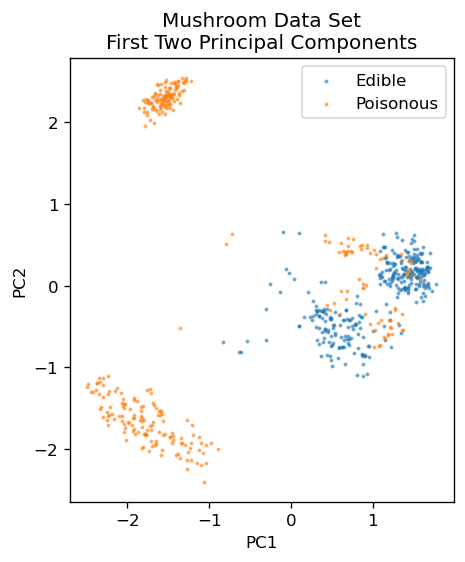

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

This function plot_mushroom_boundary is designed to visualize the decision boundary and decision probabilities for a classifier applied to the mushroom dataset: 

Function Overview

	•Purpose: The function creates a plot that shows:
	    1.	Decision Boundary: The line or region that the classifier uses to separate edible mushrooms from poisonous ones.
	    2.	Decision Probabilities: The probabilities that the classifier assigns to each region for being in one class or another.
	Inputs:
		    X: The feature matrix (after PCA, so it has 2 dimensions).
		    y: The target vector indicating whether mushrooms are edible (0) or poisonous (1).
		    fitted_model: The trained classification model that will be used to predict the classes and probabilities.

In [9]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    # This loop will create two subplots:
    # one for the decision boundary and one for the decision probabilities.
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']): 
        plt.subplot(1,2,i+1)                                                       
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

        # Meshgrid: A grid of points is created over the feature space. This grid will be used to evaluate the classifier’s 
        # predictions at many points in the space to visualize the decision boundary.
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        # Decision Boundary: In the first iteration, the model predicts the class for each point on the grid (Z stores these predictions).
	    # Decision Probabilities: In the second iteration, the model predicts the probability of each point being in the poisonous class. 
        # If the model does not support probability predictions (e.g., a hard classifier like SVM without probability=True), it displays a message instead.
        if i == 0:                                                                                             
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        # The predictions (Z) are reshaped to match the shape of the grid, which is required to properly display the results on the plot.
        Z = Z.reshape(xx.shape)
        # Scatter Plot: Edible and poisonous mushrooms are plotted as points on the graph. The alpha parameter controls the transparency, and s controls the size of the points.
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        # imshow: This overlays the predicted classes or probabilities as a color map on the plot. The color map (cmap) visually represents the decision boundary or probability surface.
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        # Aspect Ratio: set_aspect('equal') ensures that the x and y axes are scaled equally, so circles appear as circles.
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

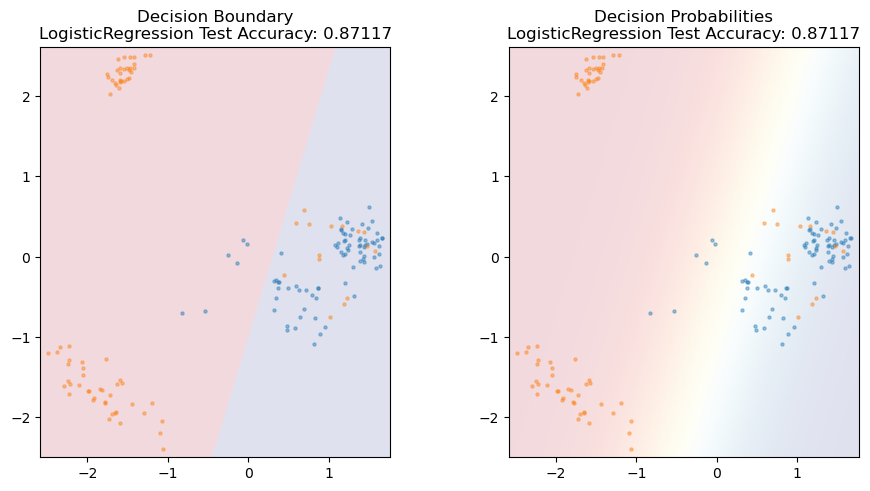

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

1.	Decision Boundary (Left Plot):
    Colored Regions: The two regions in the plot are colored differently to indicate the model’s decision boundary. One region (e.g., light blue) corresponds to the area where the model predicts mushrooms are edible, while the other region (e.g., light pink) indicates where the model predicts mushrooms are poisonous.
    Data Points: The orange and blue points represent the actual data points from the dataset:
    Blue Points: Represent edible mushrooms (y=0).
	Orange Points: Represent poisonous mushrooms (y=1).
	Boundary Line: The line separating the two colored regions is the decision boundary. This is where the model is unsure and predicts a 50/50 probability between the two classes.
    
2.	Decision Probabilities (Right Plot):
	Gradient Colors: This plot uses a gradient color map to show the model’s predicted probabilities across the feature space.
	Blue Region: Represents areas where the model is more confident that the mushrooms are edible.
	Red Region: Represents areas where the model is more confident that the mushrooms are poisonous.
	White Region: Represents areas where the model is uncertain, predicting probabilities close to 50/50.
	Data Points: Again, the orange and blue points represent the actual data points, as in the first plot.

Interpretation:

	1. Model Performance: The title indicates that the Logistic Regression model has a test accuracy of approximately 87.12%. This means that the model correctly predicts whether a mushroom is edible or poisonous about 87.12% of the time on the test data.
	2. Decision Boundary: The decision boundary is fairly linear, which is expected from a Logistic Regression model since it is a linear classifier. It does a reasonable job of separating the two classes, though some points are misclassified (e.g., some orange points in the blue region and vice versa).
	3. Decision Probabilities: The gradient in the right plot shows that the model is more certain about its predictions in regions far from the boundary (dark blue or dark red) and less certain near the boundary (lighter shades).

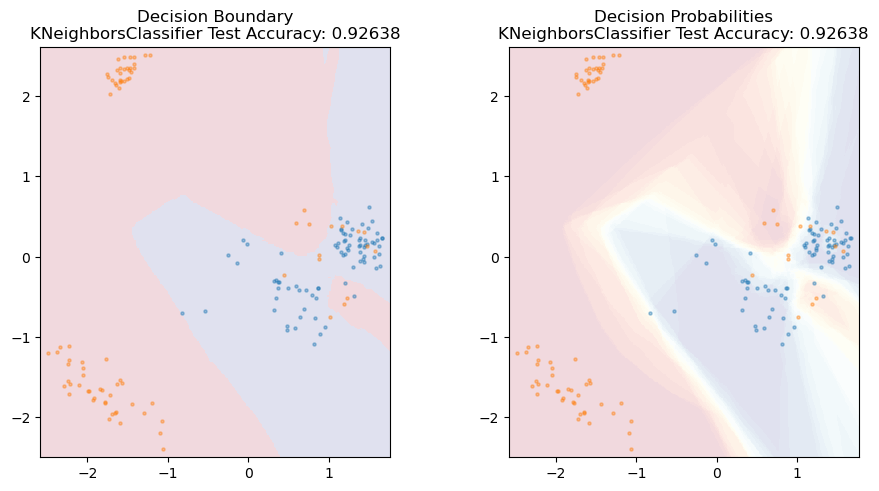

In [11]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

	1.	Decision Boundary (Left Plot):
	•	Irregular Boundary: Unlike the linear boundary observed with Logistic Regression, the k-NN classifier has a more complex, irregular decision boundary. This is because k-NN is a non-linear, instance-based learning algorithm that classifies each point based on the majority class of its nearest neighbors.
	•	Colored Regions: The regions are colored similarly to the previous plot, with one color representing the predicted edible region and another representing the predicted poisonous region.
	•	Data Points: The blue and orange points again represent edible and poisonous mushrooms, respectively. The boundary’s complexity indicates that the model is more responsive to the local distribution of the data.
	2.	Decision Probabilities (Right Plot):
	•	Complex Probability Gradient: The gradient of the decision probabilities is much more complex compared to the Logistic Regression model. The k-NN model’s decision surface changes rapidly depending on the local density and distribution of the training data.
	•	Small Pockets: You can see small pockets of different colors, showing how k-NN responds to small clusters of data points, sometimes predicting different probabilities even in nearby regions.

Interpretation:

	•	Model Performance: The k-NN model has a higher test accuracy of approximately 92.64%, indicating that it performs better on this dataset compared to the Logistic Regression model.
	•	Complex Decision Boundary: The decision boundary is more complex and non-linear, which is characteristic of k-NN classifiers. This complexity allows k-NN to capture more intricate patterns in the data, but it also makes the model more sensitive to noise and variations in the data.
	•	Decision Probabilities: The right plot shows that k-NN’s decision probabilities can change quite abruptly, depending on the local neighbors. This results in a more fragmented probability landscape compared to the smoother gradient seen with Logistic Regression.

Comparison with Logistic Regression:

	•	k-NN tends to have a more flexible and complex decision boundary, which can lead to higher accuracy but also makes the model more prone to overfitting, especially if the number of neighbors (k) is small.
	•	Logistic Regression, being a linear model, produces a simpler, more interpretable decision boundary, but it might not capture the underlying data structure as well as k-NN.

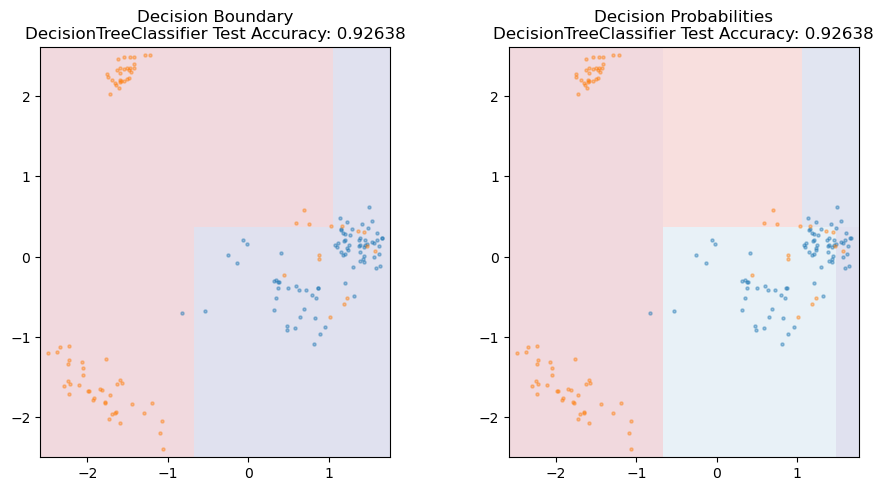

In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

	1.	Decision Boundary (Left Plot):
	•	Rectangular Regions: The decision boundary for the Decision Tree Classifier is characterized by straight, vertical and horizontal lines that split the feature space into rectangular regions. This is because decision trees partition the data by making decisions based on single features at each split, leading to axis-aligned boundaries.
	•	Colored Regions: As before, different regions are colored to indicate the predicted class—either edible or poisonous.
	•	Data Points: The blue and orange points represent edible and poisonous mushrooms, respectively. The boundary is less smooth compared to k-NN and Logistic Regression, but it’s highly interpretable.
	2.	Decision Probabilities (Right Plot):
	•	Blocky Probability Gradient: The probability plot is also blocky, reflecting the nature of decision trees. The probabilities change abruptly from one region to the next, rather than gradually. This is because each region in the decision tree corresponds to a leaf node, where all points are assigned the same predicted probability.
	•	Sharp Transitions: There are sharp transitions between regions of different probabilities, reflecting the deterministic nature of decision tree splits.

Interpretation:

	•	Model Performance: The Decision Tree Classifier has a test accuracy of approximately 92.64%, which is the same as the k-NN model in this case. This suggests that the tree is capturing the necessary patterns to classify the mushrooms effectively.
	•	Rectangular Decision Boundaries: The decision boundaries are very interpretable because they correspond to the specific splits made by the tree. Each boundary is aligned with one of the features, making it easier to understand which features are being used to make decisions.
	•	Probability Estimates: The decision probabilities are less nuanced compared to k-NN and Logistic Regression. Each region is assigned a fixed probability, leading to a “blocky” appearance, which is characteristic of decision trees.

Comparison with Previous Models:

	•	Decision Trees are highly interpretable but can create very sharp and simple boundaries, which might not always capture complex patterns in the data.
	•	k-NN provides a more flexible decision boundary that can adapt to complex data distributions, but it can be more sensitive to noise.
	•	Logistic Regression offers a smoother, linear decision boundary that is easy to interpret but may not capture non-linear patterns as effectively.

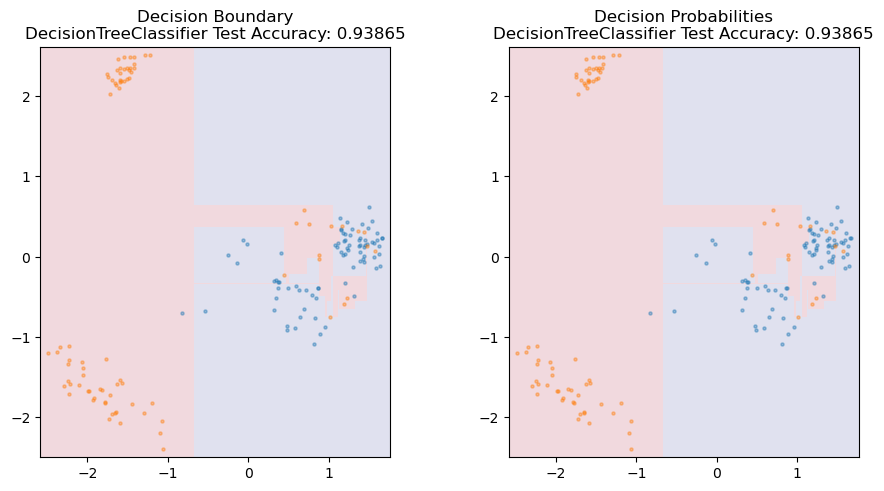

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Comparison Between the Two Decision Trees:

	1.	Decision Boundary (Left Plot):
	•	Previous Model (max_depth set):
	•	The decision boundary was relatively simple, with fewer regions. The model made decisions based on a limited number of feature splits, leading to broader, more generalized regions.
	•	Current Model (no max_depth):
	•	The decision boundary is more complex, with additional smaller regions indicating more splits. The tree has likely created additional branches to capture more specific patterns in the data, resulting in a more detailed decision boundary.
	•	This can be seen in the increased granularity of the decision regions, especially around the areas where edible and poisonous mushrooms are closer together.
	2.	Decision Probabilities (Right Plot):
	•	Previous Model (max_depth set):
	•	The probability plot was simpler, with larger blocks of uniform color, reflecting the broader, less detailed regions in the decision boundary.
	•	Current Model (no max_depth):
	•	The probability plot is more intricate, reflecting the more complex decision boundary. The model is now predicting with higher confidence in more localized regions, which can be seen as smaller, more varied blocks of color.
	•	The increased complexity in the probability plot indicates that the model is capturing more specific details of the data but might also be more prone to overfitting.
	3.	Model Performance:
	•	Previous Model: Had an accuracy of approximately 92.64%.
	•	Current Model: Has an accuracy of approximately 93.87%.
	•	The slight increase in accuracy suggests that the fully grown tree captures more of the nuances in the data, leading to better performance on the test set. However, this also comes with a risk of overfitting, where the model may perform well on the training data but might not generalize as well to new, unseen data.

Key Takeaways:

	•	Complexity and Overfitting: The fully grown decision tree is more complex, which can lead to better performance on the training data but at the risk of overfitting. This model may not generalize as well to unseen data because it might be fitting to noise or specific patterns in the training set.
	•	Decision Boundaries: The simpler tree (with max_depth set) produces broader decision boundaries that are easier to interpret but may miss some finer details in the data. The fully grown tree has more detailed boundaries that better capture the data’s structure, but they are less interpretable.
	•	Probabilities: The fully grown tree’s probability predictions are more nuanced, reflecting its detailed understanding of the data. However, these probabilities can also fluctuate more due to overfitting.

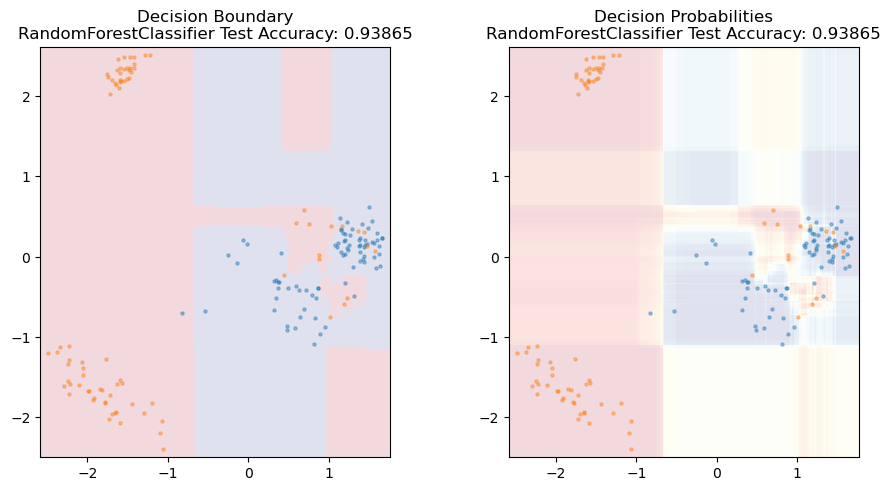

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

	1.	Decision Boundary (Left Plot):
	•	Complex, Yet Structured Boundary: The decision boundary in the Random Forest Classifier plot is a combination of multiple straight-line segments, but it appears more complex than a single decision tree. This complexity comes from the fact that a random forest aggregates the predictions from multiple decision trees, each contributing to the final decision boundary.
	•	Smoother Transitions: Compared to a single decision tree, the random forest smooths out the decision boundary by averaging the decisions of many trees, resulting in fewer abrupt changes.
	•	Data Points: The points representing edible (blue) and poisonous (orange) mushrooms are scattered across the decision regions, indicating how the random forest classifier has categorized the different areas.
	2.	Decision Probabilities (Right Plot):
	•	Intermediate Probabilities: The probability plot shows more nuanced regions where the model isn’t entirely confident, indicated by the presence of gradient colors. This is because the random forest can provide more refined probability estimates by averaging the predictions across multiple trees.
	•	Less Blocky Appearance: Compared to a single decision tree, the random forest’s probability plot is less blocky and shows a more gradual transition between high and low probabilities, reflecting the ensemble nature of the model.

Interpretation:

	•	Model Performance: The Random Forest Classifier has a test accuracy of approximately 93.87%, which matches the accuracy of the fully grown decision tree. This suggests that while both models perform similarly in terms of accuracy, the random forest may provide a more stable and generalizable model due to its ensemble nature.
	•	Ensemble Advantage: The random forest benefits from combining the predictions of multiple trees, which helps reduce overfitting (a common issue with single decision trees) and provides more reliable predictions.
	•	Decision Boundary: The decision boundary created by the random forest is more complex than that of logistic regression but more structured than a single decision tree, balancing between complexity and generalizability.

Comparison with the Decision Tree:

	•	Single Decision Tree: The boundary was simpler and more prone to sharp transitions due to the nature of the single decision tree’s axis-aligned splits.
	•	Random Forest: The boundary and probabilities are smoother and more nuanced due to the averaging effect of multiple trees, reducing the likelihood of overfitting while still capturing complex patterns in the data.

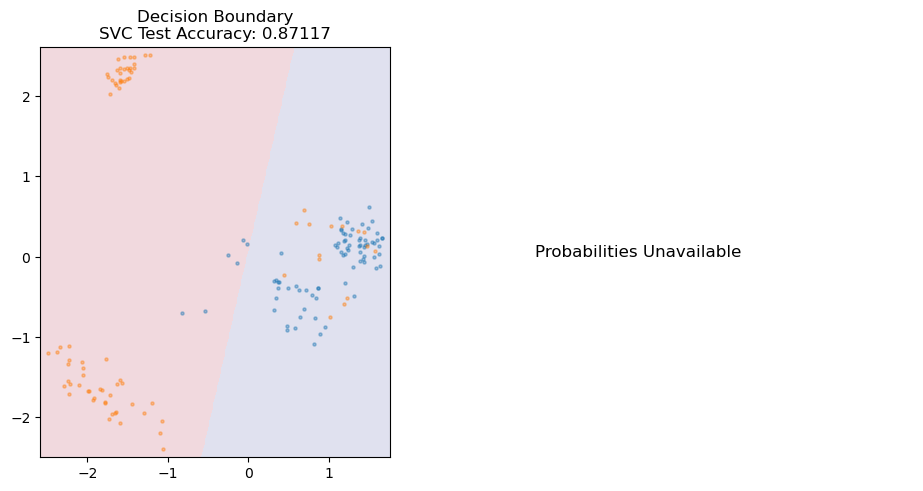

In [15]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

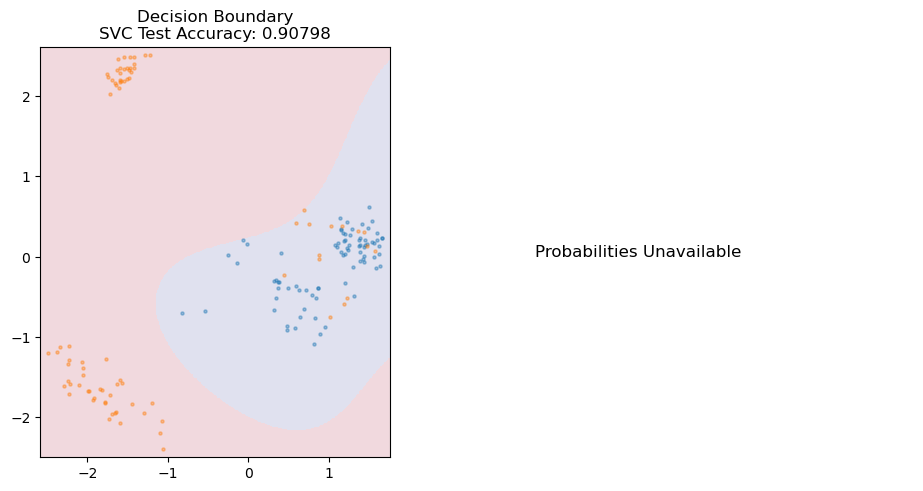

In [16]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plot:

	1.	Decision Boundary (Left Plot):
	•	Non-Linear Boundary: Unlike the straight line seen in the linear SVC, the decision boundary here is curved and more complex. This suggests that an RBF kernel (or another non-linear kernel) was used, which allows the SVC to capture non-linear relationships in the data.
	•	Data Points: The edible mushrooms (blue points) and poisonous mushrooms (orange points) are better separated compared to the linear SVC, with fewer misclassified points. The non-linear boundary seems to better capture the data’s underlying structure, leading to a more accurate classification.
	•	Improved Accuracy: The test accuracy is approximately 90.80%, which is higher than the linear SVC but still slightly lower than the Random Forest and Decision Tree classifiers. This shows that the non-linear SVC is more effective in this scenario than the linear version.
	2.	Probabilities Unavailable (Right Plot):
	•	No Probability Plot: Similar to the previous SVC example, probability estimates are not available. To obtain probabilities with SVC, the model needs to be initialized with probability=True, which requires additional computation during training.

Interpretation:

	•	Model Performance: The SVC with an RBF kernel shows a higher accuracy compared to the linear SVC, indicating that the non-linear kernel is better suited for this dataset, which likely has non-linear separations between the classes.
	•	Non-Linear Decision Boundary: The non-linear boundary allows the model to capture more complex relationships between the features, which is reflected in the improved accuracy. This flexibility is one of the key strengths of using kernels like RBF in SVMs.

Comparison with Other Models:

	•	Linear SVC: The linear SVC produced a straight decision boundary with lower accuracy (approximately 87.12%). The non-linear SVC with RBF clearly outperforms it on this dataset.
	•	Decision Trees/Random Forest: These models achieved slightly higher accuracy, around 93.87%, suggesting that they might still capture some aspects of the data that the SVC with RBF misses. However, the non-linear SVC is competitive and may offer better generalization due to the margin maximization inherent in SVMs.
	•	k-NN: k-NN provided a very flexible decision boundary, similar to the non-linear SVC. However, k-NN can be more sensitive to local data variations compared to SVM, which optimizes for the margin.

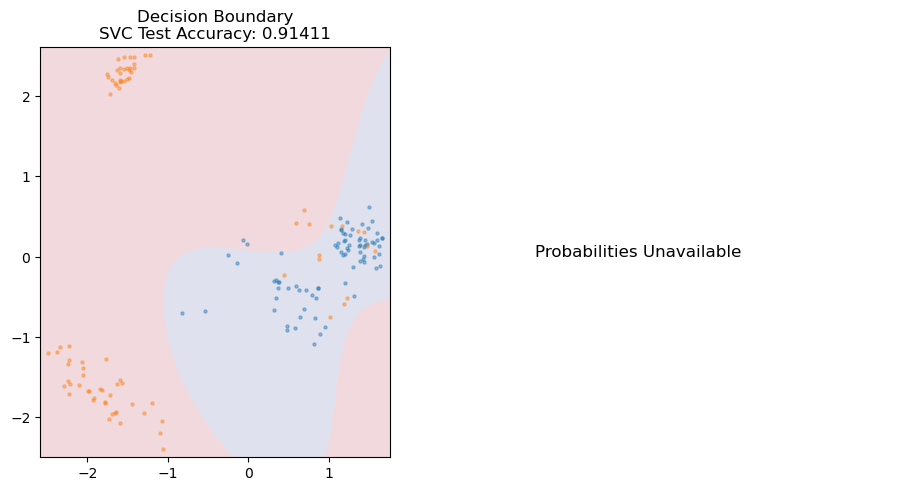

In [17]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plot:

	1.	Decision Boundary (Left Plot):
	•	Non-Linear Boundary: The decision boundary is still non-linear, characteristic of the RBF kernel, but it is slightly more complex compared to the previous SVM with the default C value. This indicates that the model is more flexible in fitting the data.
	•	Impact of C=10: The C parameter in SVM controls the trade-off between maximizing the margin and minimizing classification errors. A higher C value (like 10) means the model is less tolerant of misclassifications, leading to a more complex decision boundary as it tries to correctly classify more points.
	•	Data Points: The blue and orange points (edible and poisonous mushrooms) are better separated, with a test accuracy of approximately 91.41%, which is slightly higher than with the default C value.
	2.	Probabilities Unavailable (Right Plot):
	•	No Probability Plot: As with the previous SVM plots, probability estimates are unavailable. This is expected since the SVC was not configured to calculate probabilities (this would require probability=True when initializing the SVC).

Interpretation:

	•	Model Performance: With C=10, the SVC achieves a higher test accuracy of approximately 91.41%, indicating that the model is better at fitting the training data compared to when using a lower C value. This suggests that the higher C value allows the model to capture more complex patterns, reducing errors.
	•	Non-Linear Decision Boundary: The decision boundary is more intricate than with lower C, reflecting the model’s increased sensitivity to classification errors. This can lead to better accuracy on the training data but may also increase the risk of overfitting.

Comparison with Other Models:

	•	Lower C SVC: The previous SVC with a lower C value (likely the default, which is 1) had a slightly smoother decision boundary and lower accuracy. The higher C value provides more complex boundaries and higher accuracy.
	•	Tree-Based Models: Decision Trees and Random Forests still had slightly higher accuracies (around 93.87%), but the SVC with C=10 is competitive, offering a good balance between complexity and accuracy.
	•	Flexibility: The RBF kernel combined with a higher C value allows the SVC to create more detailed boundaries, making it better at classifying points near the boundary at the cost of increased model complexity.

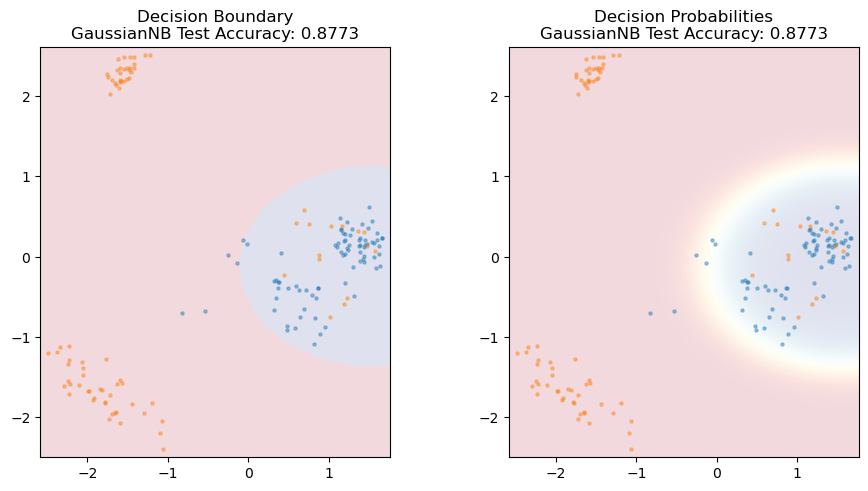

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

	1.	Decision Boundary (Left Plot):
	•	Elliptical Decision Boundary: The decision boundary in this plot is smooth and elliptical, which is typical for Gaussian Naive Bayes. This shape arises because the GaussianNB model assumes that the data for each class follows a normal (Gaussian) distribution. The boundary is where the model predicts equal probabilities for both classes.
	•	Data Points: The blue points represent edible mushrooms, while the orange points represent poisonous mushrooms. The model tries to separate these classes based on the assumption of normal distribution for the features.
	•	Test Accuracy: The model has a test accuracy of approximately 87.73%. This is lower than the more complex models like Random Forests or SVC with an RBF kernel but is still reasonable for a simple probabilistic model.
	2.	Decision Probabilities (Right Plot):
	•	Smooth Probability Gradient: The decision probabilities plot shows a smooth gradient, reflecting the Gaussian assumption. The probabilities smoothly transition from one class to the other, creating a soft decision boundary.
	•	High-Confidence Regions: The areas near the center of the blue region represent high confidence in predicting the edible class, while the surrounding red area represents high confidence in predicting the poisonous class.
	•	Circular Probability Contours: The contours are circular due to the Gaussian assumption, with the highest confidence in the regions closest to the class means.

Interpretation:

	•	Model Performance: The GaussianNB model’s accuracy of 87.73% indicates that while it is a relatively simple model, it still performs fairly well on this dataset. However, it may not capture all the complexities of the data compared to more flexible models like SVC or Random Forest.
	•	Decision Boundary: The smooth, elliptical decision boundary shows that GaussianNB assumes that the data follows a normal distribution. This assumption may or may not hold true for all features in the dataset, which can limit the model’s accuracy.
	•	Probabilities: The smooth, continuous transition in the probability plot indicates that GaussianNB provides soft classifications, meaning it assigns a probability to each class rather than making a hard decision.

Comparison with Other Models:

	•	SVC with RBF Kernel: The SVC with an RBF kernel produced a more complex, non-linear decision boundary and slightly higher accuracy, reflecting its ability to capture more intricate patterns in the data.
	•	Random Forest: The Random Forest model provided even more detailed and accurate predictions, with a more fragmented decision boundary that better fits the training data.
	•	Decision Tree: The decision boundary of a single decision tree was more axis-aligned and less smooth compared to GaussianNB, with more abrupt changes between regions.

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


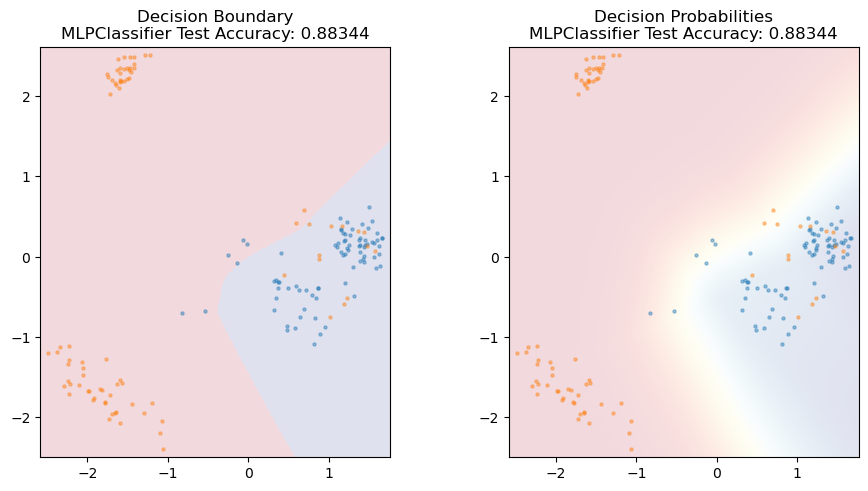

In [19]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

Understanding the Plots:

	1.	Decision Boundary (Left Plot):
	•	Non-Linear Boundary: The decision boundary is non-linear and relatively complex, characteristic of a neural network model like MLP. MLPs can capture complex patterns in the data due to their multi-layer structure and non-linear activation functions.
	•	Data Points: The data points representing edible (blue) and poisonous (orange) mushrooms are reasonably well separated, but there are still some misclassified points. The decision boundary tries to separate these classes by finding a complex shape that fits the data.
	•	Test Accuracy: The MLPClassifier has a test accuracy of approximately 88.34%. This is slightly higher than the GaussianNB model but lower than models like the SVC with an RBF kernel or Random Forest.
	2.	Decision Probabilities (Right Plot):
	•	Smooth Probability Gradient: The probability plot shows a smooth transition between the two classes, with the MLP providing probability estimates across the feature space. The gradient reflects how confident the model is in its predictions.
	•	Soft Classification: The soft, gradual change in probabilities indicates that the MLP is less certain about some regions, assigning probabilities close to 0.5 in those areas.

Interpretation:

	•	Model Performance: The MLPClassifier’s accuracy of 88.34% indicates that it is capable of capturing complex relationships in the data, but it does not outperform some of the other models like SVC with an RBF kernel or Random Forest. This might be due to the complexity of the model or the specific settings used in training.
	•	Decision Boundary: The MLP’s decision boundary is more flexible and non-linear compared to simpler models like Logistic Regression or GaussianNB. This flexibility allows it to fit more complex patterns but can also lead to overfitting if not properly regularized.
	•	Probabilities: The smooth transition in the probability plot suggests that the MLP provides well-calibrated probability estimates, though it may still struggle in regions where the classes are not easily separable.

Comparison with Other Models:

	•	GaussianNB: The MLP shows a more complex and non-linear boundary compared to GaussianNB, which had a simpler elliptical boundary. The MLP also has slightly higher accuracy.
	•	SVC with RBF Kernel: The SVC with an RBF kernel generally produced a more intricate and accurate boundary, particularly in datasets with complex patterns. The MLP performs similarly in terms of flexibility but with slightly lower accuracy.
	•	Random Forest: Random Forests typically provide a more detailed decision boundary with higher accuracy, particularly in noisy or complex datasets. The MLP offers a more continuous boundary but may not capture as many fine details as a Random Forest.